In [49]:
import numpy as np
import matplotlib.pyplot as plt

Composite Quadrature Rules:

1. Trapezoid Rule:

\begin{equation}
\int_{x_0}^{x_1} f(x) dx = \frac{h}{2} \left ( f(x_0) +  f(x_1) \right ) + \mathcal{O}(h^3)
\end{equation}

with $h = \frac{x_1 - x_0}{N}$.

2. Simpson's Rule:

\begin{equation}
\int_{x_0}^{x_2} f(x) dx = \frac{h}{3} \left ( f(x_0) +  4f(x_1) + f(x_2) \right ) + \mathcal{O}(h^5)
\end{equation}

with $h = \frac{x_2 - x_0}{2N}$.

In [55]:
def f(x):
    return np.cos(x)/x**(1.0/3.0)
    
def g(t):
    return 3.0/2.0*np.cos(t**1.5)

def integrate(xlow,xhigh,rule,function):
    
    maxN = 6
    
    I = np.zeros(maxN-2)
    error = np.zeros(maxN-2)
    N = np.zeros(maxN-2)
    
    for j in range(3,maxN+1):
        nbins = int(10**j)
        dx = (xhigh-xlow)/nbins
        I[j-3] = 0
        
        #--- Evaluate integral based on function and rule ----------
        
        if rule==1:              
            if function==1:      
                # Trapezoid, primary function
                for i in range(nbins):
                    x = xlow + i*dx
                    f0 = f(x)
                    f1 = f(x+dx)
                    I[j-3] = I[j-3] + dx/2.0*(f1 + f0)
                    
                I[j-3] = I[j-3] + 7.0E-6
    
            else:
                # Trapezoid, replacement function
                for i in range(nbins):
                    x = xlow + i*dx
                    g0 = g(x)
                    g1 = g(x+dx)
                    I[j-3] = I[j-3] + dx/2.0*(g1 + g0)
            
        else:                    
            if function==1:
                # Simpson's, primary function
                for i in range(nbins-1):
                    x = xlow + i*dx
                    f0 = f(x)
                    f1 = f(x+dx/2.0)
                    f2 = f(x+dx)
                    I[j-3] = I[j-3] + dx/6.0*(f2 + 4*f1 + f0)
                    
                I[j-3] = I[j-3] + 7.0E-6
                
            else:
                # Simpson's, replacement function
                for i in range(nbins-1):
                    x = xlow + i*dx
                    g0 = g(x)
                    g1 = g(x+dx/2.0)
                    g2 = g(x+dx)
                    I[j-3] = I[j-3] + dx/6.0*(g2 + 4*g1 + g0)
 
        #-------------
        print ("N, I, error = ",nbins,I[j-3],np.abs(I[j-3]-1.3212)/1.3212)
        N[j-3] = nbins
        error[j-3] = np.abs(I[j-3]-1.3212)/1.3212
        
    return N, I, error

N, I, error =  1000 1.5435757059970843 0.16831343172652463
N, I, error =  10000 1.3423407175670208 0.016001148627778423
N, I, error =  100000 1.3230985177381287 0.001436964682204639
N, I, error =  1000000 1.321363620373581 0.0001238422446117817
N, I, error =  1000 1.393117732919185 0.054433645866776514
N, I, error =  10000 1.327849281485439 0.005032759223008693
N, I, error =  100000 1.3217686343459616 0.0004303923296712538
N, I, error =  1000000 1.3212559749587742 4.236675656546804e-05
N, I, error =  1000 1.321222916370082 1.734511813654597e-05
N, I, error =  10000 1.3212230725681473 1.7463342527532056e-05
N, I, error =  100000 1.3212230741301345 1.746452477640145e-05
N, I, error =  1000000 1.321223074145717 1.7464536570546347e-05
N, I, error =  1000 1.3204116744940222 0.0005966738616240829
N, I, error =  10000 1.321142019333934 4.3884851699880525e-05
N, I, error =  100000 1.321214969516636 1.133024268547008e-05
N, I, error =  1000000 1.3212222636914794 1.6851113744707184e-05


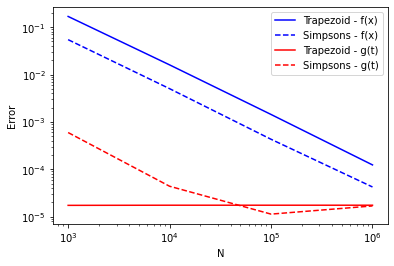

In [56]:
N1, I1, error1 = integrate(1.0E-8,1,1,1)
N2, I2, error2 = integrate(1.0E-8,1,2,1)

N3, I3, error3 = integrate(0,1,1,2)
N4, I4, error4 = integrate(0,1,2,2)

plt.plot(N1,error1,'b-',label='Trapezoid - f(x)')
plt.plot(N2,error2,'b--',label='Simpsons - f(x)')

plt.plot(N3,error3,'r-',label='Trapezoid - g(t)')
plt.plot(N4,error4,'r--',label='Simpsons - g(t)')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()